# 1. Importacion de los datos

In [ ]:
#Importo librerias


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from scipy.stats import randint

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Cargo los datos directamente de sde drive debido al alto peso del archivo
#Estos son los del train
df = pd.read_csv("/content/drive/MyDrive/Immune/Supervisados/data_train.csv")

In [ ]:
#Obtenemos los datos de test
test = pd.read_csv('/content/drive/MyDrive/Immune/Supervisados/data_test.csv')

# 2. EDA y Visualización de la información

In [ ]:
pd.set_option('display.max_columns', None) #Para que nos salgan todas las columnas y no trunque la tabla
df.head()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,M,A1,A2,A3,mav,psr,hilb,SamEn,x3,x4,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
0,360.08,42.933,60,135,0.109620,0.15281,1.75,812,0.23413,0.65476,2.0421,0.014453,0.30493,1.36910,0.55733,0.089375,0.093750,0.17286,0.014595,12,1.8930,0.52618,0.003299,0.258,0.48395,2.1362,49.342,19.25,73.75,8.0208,0
1,333.41,54.733,120,150,0.149490,0.19259,2.25,740,-0.64581,0.45448,1.3178,0.039420,0.48202,0.51023,0.71640,0.097500,0.110000,0.21055,0.016797,14,2.6258,0.61896,0.002891,0.220,0.32814,1.5259,28.785,45.00,89.25,25.8700,0
2,359.18,46.600,90,180,0.169420,0.23900,3.00,606,0.26447,0.61511,2.0970,0.008673,0.31914,1.39090,0.59793,0.095625,0.106870,0.17792,0.014741,9,1.8930,0.56023,0.005732,0.302,0.34270,1.8921,32.381,28.50,78.25,13.4750,0
3,416.67,41.867,0,135,0.119590,0.15029,1.75,816,0.65061,0.65536,1.7065,0.016068,0.39236,0.83470,0.54609,0.083750,0.081875,0.15856,0.007259,9,2.0151,0.50644,0.003233,0.288,0.47740,1.8311,16.677,28.50,77.50,13.6130,0
4,544.08,49.333,120,120,0.099658,0.16490,2.00,792,-0.14313,0.61120,1.9452,0.000729,0.42743,1.15410,0.64798,0.090000,0.096875,0.15663,0.009556,10,1.8930,0.28983,0.003547,0.266,0.48095,2.0142,12.484,24.75,74.75,10.5270,0


In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
TCI,9146.0,504.320221,262.511975,121.520000,297.872500,436.110000,631.140000,1861.20000
TCSC,9146.0,26.311054,20.286627,2.266700,10.533000,17.333000,42.450250,83.86700
exp,9146.0,86.337743,74.512381,0.000000,30.000000,75.000000,120.000000,450.00000
expmod,9146.0,145.712880,66.011499,15.000000,90.000000,135.000000,195.000000,375.00000
cm,9146.0,0.153696,0.055616,0.029897,0.109620,0.149490,0.189350,0.35877
cvbin,9146.0,0.182451,0.063978,0.015760,0.152180,0.202680,0.234860,0.25025
frqbin,9146.0,2.793489,1.310632,0.000000,1.750000,2.500000,3.750000,8.75000
abin,9146.0,727.499344,126.400750,500.000000,624.000000,718.000000,813.000000,984.00000
kurt,9146.0,6.194699,5.669886,-1.618400,0.690283,6.123800,9.218200,57.36900
vfleak,9146.0,0.709490,0.167951,0.114860,0.662507,0.771580,0.824950,0.91703


Este chequeo rapido de los datos ya nos está indicando que las variables numéricas tienen mucha diferencia de valores por lo que será necesario una transfomracion de los datos previo a generar el modelo

In [ ]:
df.dtypes

TCI       float64
TCSC      float64
exp         int64
expmod      int64
cm        float64
cvbin     float64
frqbin    float64
abin        int64
kurt      float64
vfleak    float64
M         float64
A1        float64
A2        float64
A3        float64
mav       float64
psr       float64
hilb      float64
SamEn     float64
x3        float64
x4          int64
x5        float64
x1        float64
x2        float64
bCP       float64
bWT       float64
bW        float64
Li        float64
count1    float64
count2    float64
count3    float64
VF          int64
dtype: object

Todas las variables son numericas por lo que no tendremos que hacer transformaciones adicionales

In [ ]:
df.count()

TCI       9146
TCSC      9146
exp       9146
expmod    9146
cm        9146
cvbin     9146
frqbin    9146
abin      9146
kurt      9146
vfleak    9146
M         9146
A1        9146
A2        9146
A3        9146
mav       9146
psr       9146
hilb      9146
SamEn     9146
x3        9146
x4        9146
x5        9146
x1        9146
x2        9146
bCP       9146
bWT       9146
bW        9146
Li        9146
count1    9146
count2    9146
count3    9146
VF        9146
dtype: int64

Vemos que no tenemos atributos vacios en nuestras observaciones

In [ ]:
print(df["VF"].value_counts())

0    7590
1    1556
Name: VF, dtype: int64


Contamos el numero de observaciones que hay de ritmo normal (0) y ritmo afectado (1). Se ve descompensado ya qure hay bastantes mas datos de normal que de afectado lo que puede dar problemas al dar más peso a estas observaciones. EN principio no vamos a modificar nada pero puede que se anecesario si vemos que no ajusta correctamente

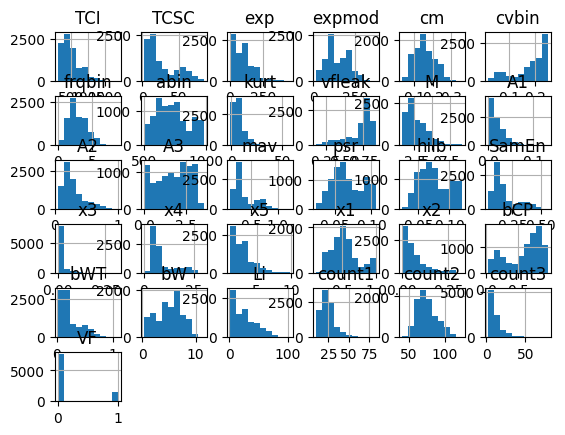

In [ ]:
df.hist()
plt.show()

Observamos variedad de distribuciones: hay algunos que se distribuyen de forma normal, pero tambien vemos otros que presentan ensanchamientos de hombros

<Axes: >

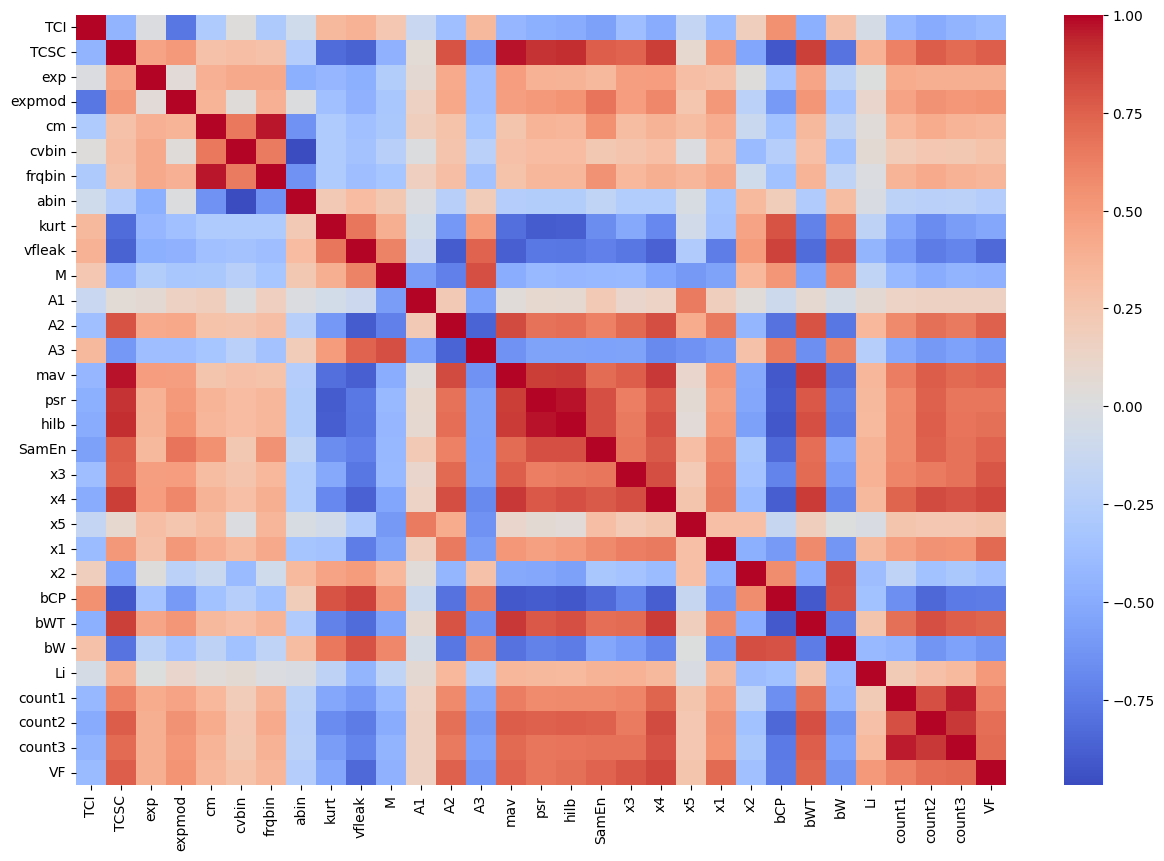

In [ ]:
#Observamos la correlacion de las variables
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=False, cmap='coolwarm')

Dado el alto numero de variables es complicado interpretar este gráfico. Lo que si que se puede saber es que hay muchas variables que están correlacionadas lo que puede darnos problemas posteriormente

In [ ]:
#sns.pairplot(df, hue = 'VF')
#Ser intentó realizar pero dado el alto numero de variables no es posible hacerlo

# 3. Transformacion y modelado

##3.1 Transaformacion y separación de las variables

Hacemos la transformacion de nuestras variables. Como solo disponemos de variables numéricas lo único que vamos a hacer es un escalado max min para todas las variables. Además, separamos las vairables


In [ ]:
#COmenzamos con nuestro set de train
train_x = df.drop(labels="VF", axis=1)

In [ ]:
#Corroboramos que todo esté bien
train_x.head()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,M,A1,A2,A3,mav,psr,hilb,SamEn,x3,x4,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3
0,360.08,42.933,60,135,0.109620,0.15281,1.75,812,0.23413,0.65476,2.0421,0.014453,0.30493,1.36910,0.55733,0.089375,0.093750,0.17286,0.014595,12,1.8930,0.52618,0.003299,0.258,0.48395,2.1362,49.342,19.25,73.75,8.0208
1,333.41,54.733,120,150,0.149490,0.19259,2.25,740,-0.64581,0.45448,1.3178,0.039420,0.48202,0.51023,0.71640,0.097500,0.110000,0.21055,0.016797,14,2.6258,0.61896,0.002891,0.220,0.32814,1.5259,28.785,45.00,89.25,25.8700
2,359.18,46.600,90,180,0.169420,0.23900,3.00,606,0.26447,0.61511,2.0970,0.008673,0.31914,1.39090,0.59793,0.095625,0.106870,0.17792,0.014741,9,1.8930,0.56023,0.005732,0.302,0.34270,1.8921,32.381,28.50,78.25,13.4750
3,416.67,41.867,0,135,0.119590,0.15029,1.75,816,0.65061,0.65536,1.7065,0.016068,0.39236,0.83470,0.54609,0.083750,0.081875,0.15856,0.007259,9,2.0151,0.50644,0.003233,0.288,0.47740,1.8311,16.677,28.50,77.50,13.6130
4,544.08,49.333,120,120,0.099658,0.16490,2.00,792,-0.14313,0.61120,1.9452,0.000729,0.42743,1.15410,0.64798,0.090000,0.096875,0.15663,0.009556,10,1.8930,0.28983,0.003547,0.266,0.48095,2.0142,12.484,24.75,74.75,10.5270


In [ ]:
train_y = df['VF']

In [ ]:
#Corroboramos que todo esté bien
train_y.head()

0    0
1    0
2    0
3    0
4    0
Name: VF, dtype: int64

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
trans_train_x = min_max_scaler.fit_transform(train_x)

In [ ]:
#En nuestro set de test separamos las variables
test_x = test.drop(labels="VF", axis=1)
test_y = test['VF']

In [ ]:
#Transformamos las variables de test

trans_test_x = min_max_scaler.fit_transform(test_x)

##3.2 Regresión logística

In [ ]:
#Empezamos entrenando una regresion logistica
reglog = LogisticRegression(random_state=1231) #Introducimos una semilla para aleatorizacion

#Ajustamos el modelo con los datos
reglog.fit(trans_train_x, train_y)

LogisticRegression(random_state=1231)

In [ ]:
pred_y = reglog.predict(trans_test_x)
precision_regres = accuracy_score(test_y, pred_y, normalize=True)
print("Precisión del modelo:", precision_regres)

Precisión del modelo: 0.99


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       170
           1       0.94      1.00      0.97        30

    accuracy                           0.99       200
   macro avg       0.97      0.99      0.98       200
weighted avg       0.99      0.99      0.99       200



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_y)
cm

array([[168,   2],
       [  0,  30]])

Obtenemos una precision del modelo muy alto. En nuestro reporte y matrix de confusion podemos ver que solo se ha equivoccado dando dos falsos positivos de 200 observaciones, lo que son muy buenos resultados.

In [ ]:
#Obtenemos el AUC
pred_y_prob = reglog.predict_proba(trans_test_x)[:, 1]
print(pred_y_prob) #Calculamos las probabilidades

[5.65706356e-03 2.19295655e-02 2.29387816e-02 1.87772420e-02
 9.77257922e-02 7.32868694e-02 2.67385805e-02 4.64945858e-04
 2.58294320e-03 2.63345780e-03 3.83427260e-08 8.26183559e-09
 4.07045751e-08 4.68139523e-08 6.17818201e-09 3.98058197e-08
 6.32847862e-09 1.70219659e-04 9.99930394e-01 9.99937578e-01
 4.53419672e-06 7.26736073e-06 9.21462151e-01 3.02167647e-04
 2.59331854e-05 1.41865044e-05 2.65440276e-06 1.56710003e-06
 2.99881232e-06 3.98138458e-06 2.14314553e-06 4.17677008e-06
 9.99993538e-01 9.99961685e-01 9.99876411e-01 9.99984817e-01
 9.99985152e-01 9.96068690e-01 2.76629904e-06 5.39620393e-06
 1.30313117e-06 3.44372305e-07 1.41445456e-06 4.98666571e-07
 2.04001974e-07 9.99992719e-01 9.99998472e-01 9.99946004e-01
 3.52893746e-04 5.18038480e-04 2.73045233e-04 1.14632376e-04
 8.33407167e-05 2.42511314e-01 7.96852483e-02 1.70653256e-01
 8.21063833e-02 1.37867266e-02 9.39385195e-01 1.25607984e-02
 9.99995101e-01 4.72772562e-06 3.09677469e-01 4.13609249e-03
 1.04156843e-01 6.938109

In [ ]:
auc_reglog = roc_auc_score(test_y, pred_y_prob)
print(auc_reglog)

0.9996078431372549


##3.3 XGBoost

Debido al alto numero de parámetros en los siguientes modelos, voy a optimizar los hiperparámetros de los algoritmos con el uso del Pipeline, que nos permitirá estudiar combinaciones de los hiperparámetros con el objetivo de encontrar la que mejor ajuste al modelo.

In [ ]:
pipe = Pipeline([('algoritmo',XGBClassifier())]) #Definimos el algoritmo

#Establecemos los valores que queremos que se varíen
grid = [{'algoritmo': [XGBClassifier()],
#         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1,None],
         'algoritmo__max_depth': [5,10,20,None],
         'algoritmo__reg_alpha': [0,0.1,0.5,1,None],
         'algoritmo__reg_lambda': [0.01,0.1,1,None],
         'algoritmo__n_estimators': [100,500,1000]}
       ]

In [ ]:
# Usando random_search

random_search_XGBoost = RandomizedSearchCV(estimator = pipe,
                                    param_distributions = grid,
                                    n_iter = 100, #Uso solo 100 iteraciones para no alargar el proceso
                                    cv = 5, #Numero de divisiones del set que se usan para valdiación cruzada
                                    scoring = 'accuracy', #Usamos la precision como métrica
                                    verbose = 1)

modelo_XGBoost = random_search_XGBoost.fit(trans_train_x, train_y)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
#Hacemos un data frame con los hipeparámetros usados y los resultados de accuracy de las valdiacioens cruzadas
df_random_XGBoost = pd.DataFrame(random_search_XGBoost.cv_results_).sort_values(by = 'rank_test_score')
df_random_XGBoost

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo__verbosity,param_algoritmo__reg_lambda,param_algoritmo__reg_alpha,param_algoritmo__n_estimators,param_algoritmo__max_depth,param_algoritmo__learning_rate,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
66,0.385001,0.042443,0.005918,0.000351,0,0.1,0.5,100,None,0.01,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.953552,0.945872,0.998360,0.973756,0.985238,0.971356,0.019463,1
38,0.426378,0.058073,0.005989,0.000433,0,0.01,1,100,20,0.01,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.953552,0.944232,0.997813,0.973756,0.985785,0.971027,0.019830,2
51,0.423029,0.063759,0.006202,0.000480,0,1,1,100,10,0.01,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.949727,0.946966,0.997813,0.972663,0.984144,0.970262,0.019606,3
93,0.469202,0.065107,0.006795,0.001065,0,1,0,100,10,0.01,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.948087,0.945325,0.997813,0.972663,0.985238,0.969825,0.020502,4
67,1.464170,1.288860,0.008006,0.002177,0,1,None,100,10,0.01,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.948087,0.945325,0.997813,0.972663,0.985238,0.969825,0.020502,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,1.957044,1.929710,0.018888,0.011851,0,1,0.1,1000,5,0.1,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.932240,0.898305,0.997266,0.981411,0.991799,0.960204,0.038562,96
98,0.434463,0.035994,0.007235,0.000360,0,0.01,None,500,10,None,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.936066,0.892291,0.998360,0.982504,0.991799,0.960204,0.040364,97
40,1.609956,1.292314,0.011036,0.005954,0,None,1,1000,None,None,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.929508,0.898852,0.997813,0.981957,0.990159,0.959658,0.038703,98
81,0.619681,0.017840,0.008693,0.000601,0,None,0.5,1000,20,None,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.919126,0.903773,0.997813,0.981957,0.991252,0.958784,0.039277,99


In [ ]:
#Imprimimos las diez primeras prediccioens sobre los datos de test
pred_b = modelo_XGBoost.best_estimator_.predict_proba(trans_test_x)[:, 1]
print(pred_b[0:10])

pred_grid_XGBoost = modelo_XGBoost.best_estimator_.predict(trans_test_x)


[0.0784309  0.08898908 0.16082378 0.09529574 0.14309667 0.10742342
 0.25286403 0.07811078 0.08107335 0.11855987]


In [ ]:
#Xomparamos la accuracy de los datos de training y de test

#Accuracy de training
train_XGBoost = df_random_XGBoost.mean_test_score.max()
print(train_XGBoost)

#Accuracy de test
test_XGBoost = accuracy_score(test_y, pred_grid_XGBoost)
print(test_XGBoost)

0.9713555438039838
0.98


In [ ]:
#Obtenemos el AUC (área bajo la curva) que nos dice como de bien separa las dos clases nuestro modelo
auc_XGBoost = roc_auc_score(test_y,pred_grid)
print(auc_XGBoost)

0.9745098039215686


##3.4 Random Forest

Hacemos lo mismo con Random Forest

In [ ]:
# Crear un pipeline con un clasificador RandomForest
pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])


In [ ]:
# Definir el espacio de búsqueda para RandomizedSearchCV
random.seed(1231) #Establecemos una semilla para la generacion de nuestros numeros aleatorios
param_dist = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': randint(1, 100), #Vamos a coger numeros de arboles entre 1 y 100
    'classifier__max_depth': randint(1, 20),  #Profundidad maxima de los árboles
}

In [ ]:
#Mismas condiciones que en caso anterior
random_search_RandomForest = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42
)
modelo_RandomForest = random_search_RandomForest.fit(trans_train_x, train_y)

In [ ]:
df_random_RandomForest = pd.DataFrame(random_search_RandomForest.cv_results_).sort_values(by = 'rank_test_score')
df_random_RandomForest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
83,1.006685,0.229245,0.012176,0.002956,"RandomForestClassifier(max_depth=19, n_estimat...",19,44,{'classifier': RandomForestClassifier(max_dept...,0.945902,0.904866,0.997813,0.979770,0.989612,0.963593,0.034268,1
66,0.252995,0.007249,0.003977,0.000074,"RandomForestClassifier(max_depth=19, n_estimat...",7,15,{'classifier': RandomForestClassifier(max_dept...,0.932240,0.916894,0.998907,0.977037,0.987425,0.962501,0.032105,2
64,1.352539,0.184030,0.019611,0.004446,"RandomForestClassifier(max_depth=19, n_estimat...",4,94,{'classifier': RandomForestClassifier(max_dept...,0.925137,0.923455,0.997813,0.972116,0.986331,0.960970,0.031036,3
45,0.755674,0.110013,0.010351,0.001805,"RandomForestClassifier(max_depth=19, n_estimat...",8,35,{'classifier': RandomForestClassifier(max_dept...,0.941530,0.896665,0.996720,0.979224,0.990159,0.960859,0.037353,4
96,0.055523,0.005031,0.002776,0.000058,"RandomForestClassifier(max_depth=19, n_estimat...",19,2,{'classifier': RandomForestClassifier(max_dept...,0.907104,0.957354,0.995626,0.966648,0.973756,0.960098,0.029352,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.044277,0.002446,0.002527,0.000126,"RandomForestClassifier(max_depth=19, n_estimat...",2,6,{'classifier': RandomForestClassifier(max_dept...,0.833880,0.921268,0.993439,0.969382,0.985785,0.940751,0.059034,96
56,0.055731,0.004411,0.002626,0.000862,"RandomForestClassifier(max_depth=19, n_estimat...",14,3,{'classifier': RandomForestClassifier(max_dept...,0.868306,0.864407,0.996720,0.974303,0.985785,0.937904,0.058860,97
78,0.058429,0.004519,0.002193,0.000050,"RandomForestClassifier(max_depth=19, n_estimat...",13,3,{'classifier': RandomForestClassifier(max_dept...,0.844809,0.874248,0.993439,0.979224,0.988518,0.936048,0.063332,98
77,0.007389,0.000808,0.001582,0.000073,"RandomForestClassifier(max_depth=19, n_estimat...",1,1,{'classifier': RandomForestClassifier(max_dept...,0.808197,0.959541,0.993986,0.958994,0.955714,0.935286,0.065061,99


In [ ]:
pred_c = modelo_RandomForest.best_estimator_.predict_proba(trans_test_x)[:, 1]
print(pred_c[0:10])

pred_grid_RandomForest = modelo_RandomForest.best_estimator_.predict(trans_test_x)


[0.06818182 0.13636364 0.11363636 0.20454545 0.06818182 0.18181818
 0.27272727 0.         0.18181818 0.11363636]


In [ ]:
#Comparamos la accuracy de los datos de training y de test

#Accuracy de training
train_RandomForest = df_random_RandomForest.mean_test_score.max()
print(train_RandomForest)

#Accuracy de test
test_RandomForest = accuracy_score(test_y, pred_grid_RandomForest)
print(test_RandomForest)

0.9635925749984315
0.985


In [ ]:
#AUC
auc_RandomForest = roc_auc_score(test_y,pred_grid_RandomForest)
print(auc_RandomForest)

0.977450980392157


##3.5 SVC

In [ ]:
# Crear un pipeline con un clasificador SVC
pipeline = Pipeline([
    ('classifier', SVC(probability=True))  #Establecemos la probabilidad true para que nos calcule probabilidades y no nos de problemas despues
])


In [ ]:
# Definir el espacio de búsqueda para RandomizedSearchCV
param_dist = {
    'classifier': [SVC(probability=True)],
    'classifier__C': [0.1, 1, 10, 100], #Superficie de decision
    'classifier__kernel': ['linear', 'rbf'] #Forma de la superficie
}

In [ ]:
# Mismos que en caso anterior
random_search_SVC = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42
)

modelo_SVC = random_search_SVC.fit(trans_train_x, train_y)

In [ ]:
df_random_SVC = pd.DataFrame(random_search_SVC.cv_results_).sort_values(by='rank_test_score')
df_random_SVC

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__kernel,param_classifier__C,param_classifier,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,1.380148,0.126937,0.074887,0.007123,rbf,0.1,"SVC(C=0.1, probability=True)","{'classifier__kernel': 'rbf', 'classifier__C':...",0.946995,0.894478,0.995079,0.968835,0.981957,0.957469,0.035273,1
7,0.719860,0.095205,0.021490,0.003501,rbf,100,"SVC(C=0.1, probability=True)","{'classifier__kernel': 'rbf', 'classifier__C':...",0.952459,0.861126,0.997813,0.979224,0.993986,0.956922,0.050478,2
3,1.056720,0.197188,0.055636,0.013978,rbf,1,"SVC(C=0.1, probability=True)","{'classifier__kernel': 'rbf', 'classifier__C':...",0.939344,0.880262,0.997813,0.972663,0.988518,0.955720,0.042654,3
0,0.883650,0.189634,0.030311,0.007714,linear,0.1,"SVC(C=0.1, probability=True)","{'classifier__kernel': 'linear', 'classifier__...",0.936612,0.879716,0.995079,0.967742,0.985238,0.952877,0.041633,4
5,0.720781,0.111284,0.025335,0.003817,rbf,10,"SVC(C=0.1, probability=True)","{'classifier__kernel': 'rbf', 'classifier__C':...",0.918579,0.865500,0.998907,0.983598,0.992892,0.951895,0.051904,5
2,0.945001,0.345638,0.027052,0.009869,linear,1,"SVC(C=0.1, probability=True)","{'classifier__kernel': 'linear', 'classifier__...",0.916940,0.867687,0.996173,0.969382,0.987425,0.947521,0.048468,6
4,0.755694,0.176209,0.013457,0.003954,linear,10,"SVC(C=0.1, probability=True)","{'classifier__kernel': 'linear', 'classifier__...",0.920219,0.856206,0.997266,0.972116,0.986331,0.946428,0.052276,7
6,2.536089,0.843397,0.015096,0.003520,linear,100,"SVC(C=0.1, probability=True)","{'classifier__kernel': 'linear', 'classifier__...",0.922404,0.845271,0.997266,0.974303,0.986331,0.945115,0.056134,8


In [ ]:
pred_c = modelo_SVC.best_estimator_.predict_proba(trans_test_x)[:, 1]
print(pred_c[0:10])

pred_grid_SVC = modelo_SVC.best_estimator_.predict(trans_test_x)

[0.00089387 0.00797649 0.00545761 0.00484656 0.06184855 0.03407152
 0.02853101 0.00063281 0.01016895 0.00517607]


In [ ]:
#Comparamos la accuracy de los datos de training y de test

#Accuracy de training
train_SVC = df_random_SVC.mean_test_score.max()
print(train_SVC)

#Accuracy de test
test_SVC = accuracy_score(test_y, pred_grid_SVC)
print(test_SVC)

0.9574688907014195
0.985


In [ ]:
#AUC
auc_SVC = roc_auc_score(test_y,pred_grid_SVC)
print(auc_SVC)


0.977450980392157


# 4. Conclusiones

In [ ]:
#Resultados
resultados = {
    'Modelos': ['Regresion logística', 'XGBoost', 'Random Forest', 'SVC'],
    'Train': ['NA', train_XGBoost, train_RandomForest, train_SVC],
    'Test': [precision_regres, test_XGBoost, test_RandomForest, test_SVC],
    'AUC': [auc_reglog, auc_XGBoost, auc_RandomForest, auc_SVC ]
}

# Crear DataFrame
df = pd.DataFrame(resultados)

# Mostrar el DataFrame
print(df)

               Modelos     Train   Test       AUC
0  Regresion logística        NA  0.990  0.999608
1              XGBoost  0.971356  0.980  0.974510
2        Random Forest  0.963593  0.985  0.977451
3                  SVC  0.957469  0.985  0.977451


En principio no hemos hecho valdiacion cruzada en regresion logistica, pero con los altos valores que hemos obtenido con el test no ha sido necesario. De entre todos los modelos yo seleccionaría una regresion logistica ya que tiene muy buenos valores de las predicciones sobre el test y además es un modelo mu sencillo y por lo tanto más facil de manejar y por lo tanto menos costoso computacionalmente